# Curso BancoEstado-CMM: Aprendizaje de Máquinas Avanzado 
**Autores:** Taco de Wolff, Nicolas Caro y Felipe Tobar  

**Fecha:** 10 enero, 2020

# Módulo 10 - Discubrir estructura en datos usando teoría de grafos
Instalar con `conda install pomegranate pygraphviz Pillow`.

In [2]:
import numpy as np
import pandas as pd
from pomegranate import *

import seaborn as sns;
sns.set(style="ticks", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing

import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

Cargamos los datos de los clientes, per solamente las columnas `edad`, `CLASE`, `DDVI`, `DDVI1`, `DDVI2`, `DDVI3`, `Prob_est_SICNEW`, `PTJE_SICNEW`. Esas columnas usamos para monstrar aprendizaje de dependencia entre las columnas. Usar más columnas es difícil entrenar; el aprendizaje de una red Bayesiana a través los datos crece exponencial en el número de parametros.

In [3]:
df0 = pd.read_csv('../modulo8/clientes.csv', low_memory=False, usecols=[
    'edad', 'CLASE', 'DDVI', 'DDVI1', 'DDVI2', 'DDVI3', 'Prob_est_SICNEW', 'PTJE_SICNEW',
])
df0 = df0.dropna()
df0.head(100)

,edad,DDVI,DDVI1,DDVI2,DDVI3,CLASE,Prob_est_SICNEW,PTJE_SICNEW
0,84.0,0.0,0.0,0.0,0.0,0,0.041780,958.219614
1,81.0,0.0,0.0,0.0,0.0,0,0.015100,984.900069
2,80.0,357.0,266.0,210.0,258.0,0,0.003401,996.599478
4,74.0,102.0,105.0,100.0,90.0,0,0.005062,994.937855
5,75.0,1819.0,1784.0,1807.0,1758.0,0,0.014002,985.998081
7,75.0,0.0,0.0,0.0,0.0,0,0.041780,958.219614
8,75.0,0.0,0.0,0.0,0.0,0,0.015100,984.900069
9,67.0,1346.0,1347.0,1322.0,1309.0,0,0.021095,978.904617
13,69.0,1442.0,1485.0,1531.0,1570.0,0,0.008740,991.259682
14,74.0,0.0,0.0,0.0,0.0,0,0.041780,958.219614


¿Cómo se ven las distribuciones de nuestras columnas? Tomamos nota de que las distribuciones de `DDVI`, `DDVI1`, `DDVI2`, `DDVI3` son sesgadas. Eso arreglamos con una transformación logarítmico.

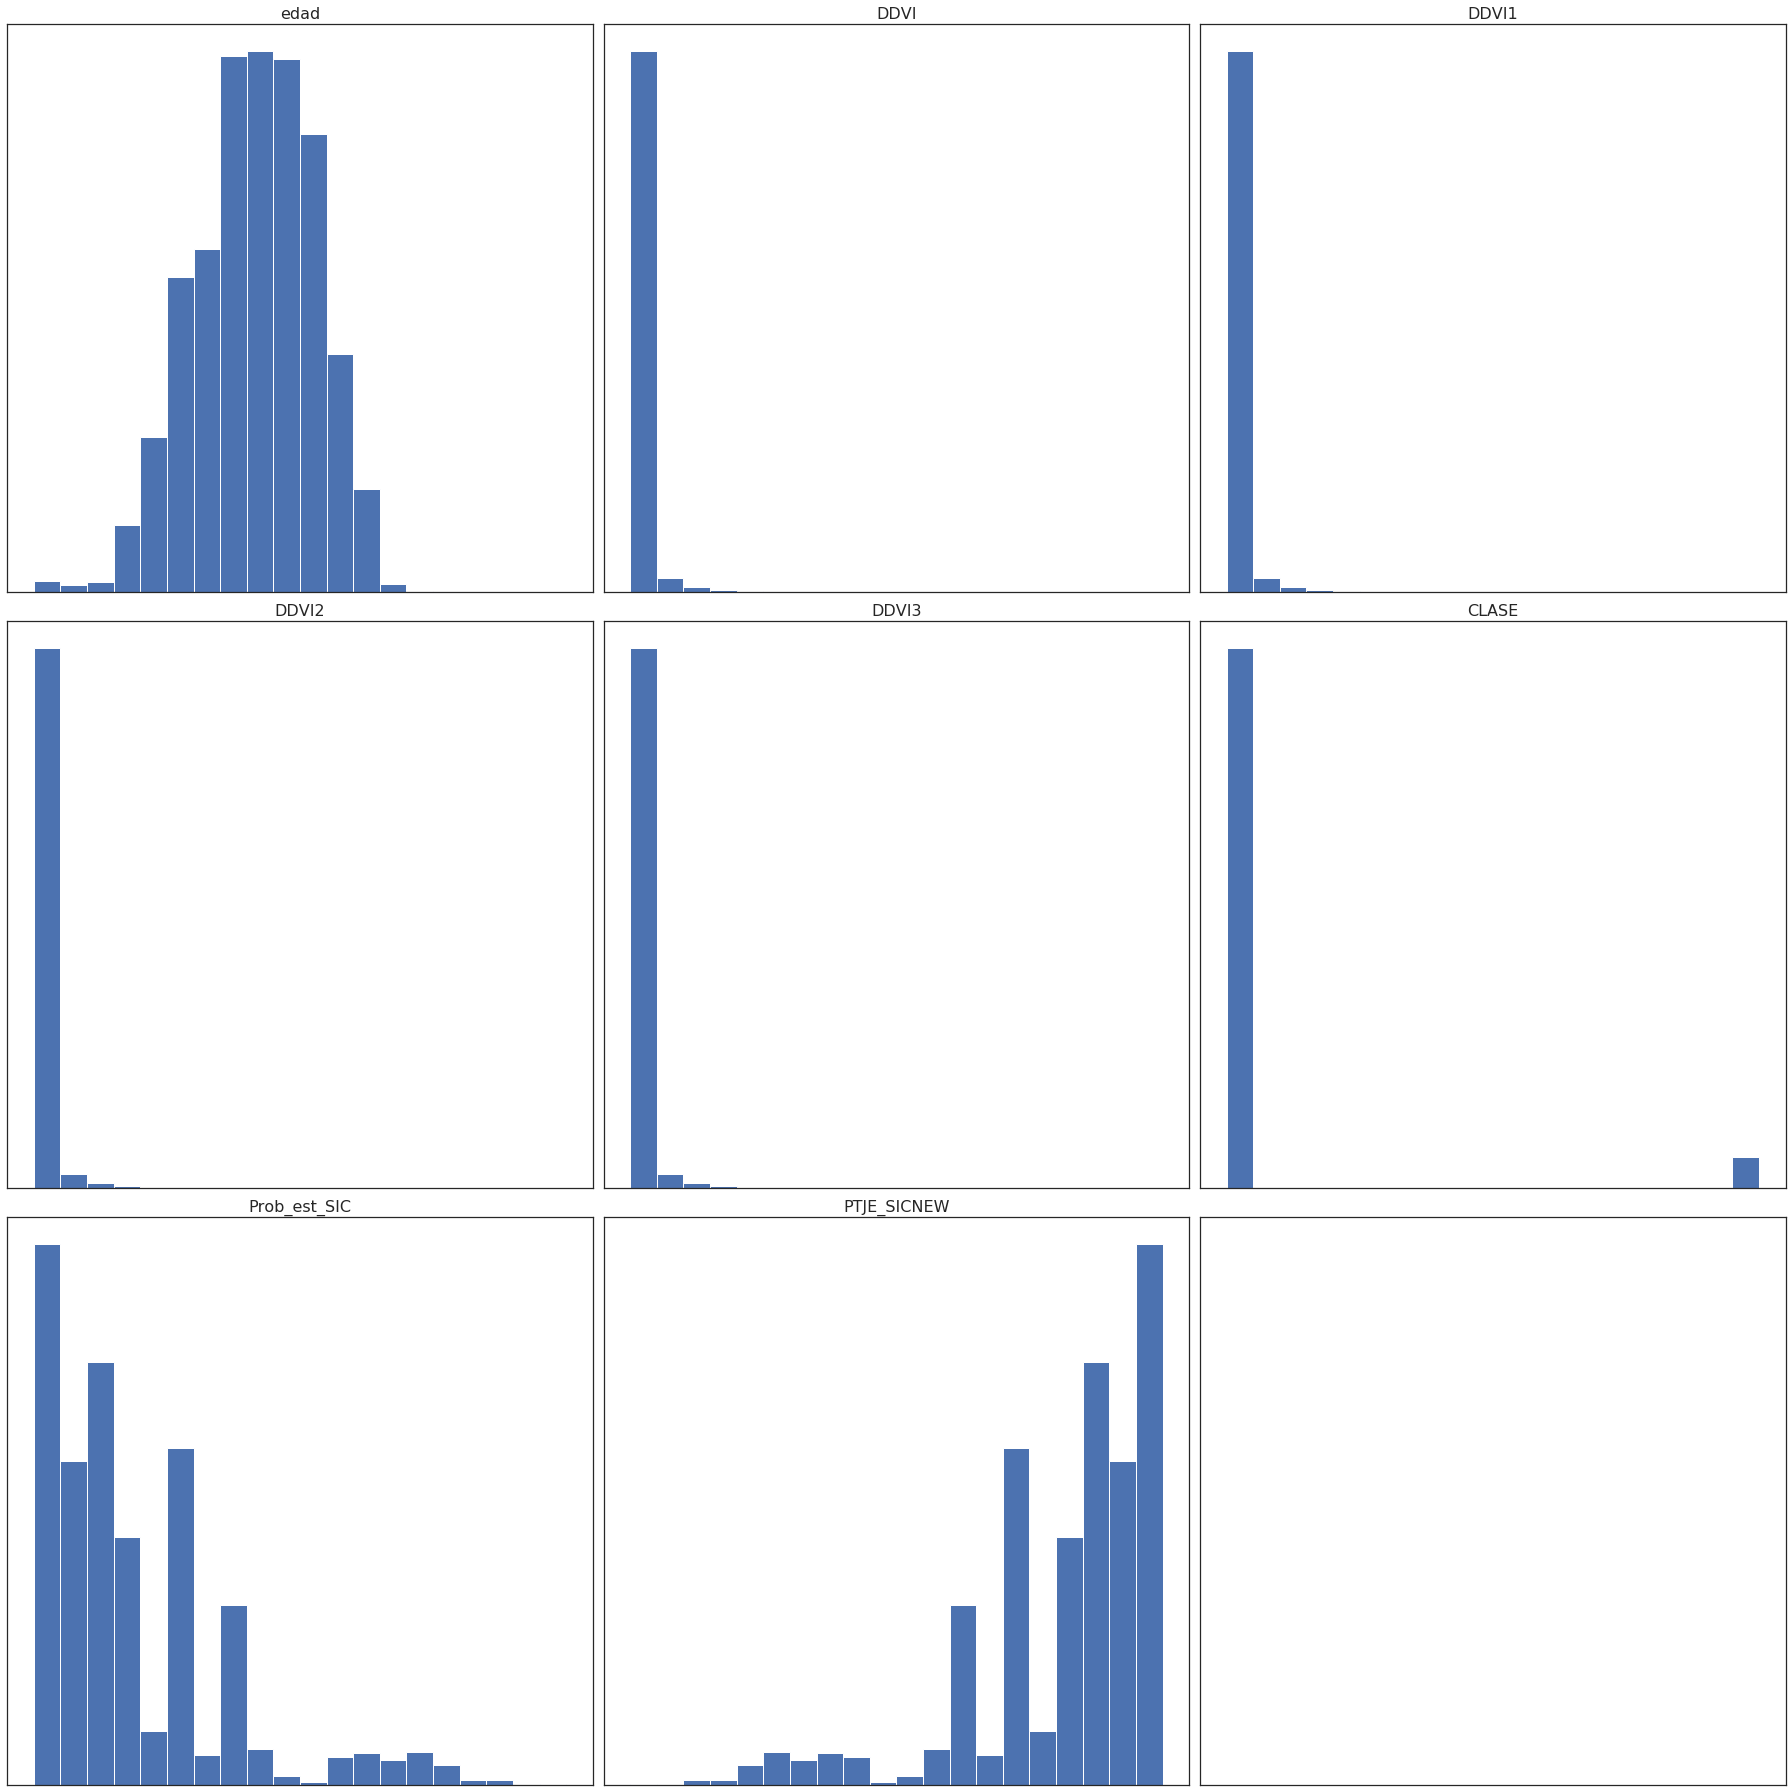

In [4]:
def plot_histograms(df):
    width = int(np.ceil(np.sqrt(len(df.columns))))
    height = int(np.ceil(len(df.columns) / width))
    fig, axes = plt.subplots(height, width, figsize=(25, 25), tight_layout=True)

    for j in range(height):
        for i in range(width):        
            ax = axes[j,i]
            col = j*width+i
            if col < len(df.columns):
                title = df.columns[col]
                if len(title) > 12:
                    title = title[:12]
                ax.set_title(title, fontdict={'fontsize': 16.0})
                
                data = df.iloc[:, col]
                ax.hist(data, bins=20)            
            ax.tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)

plot_histograms(df0)

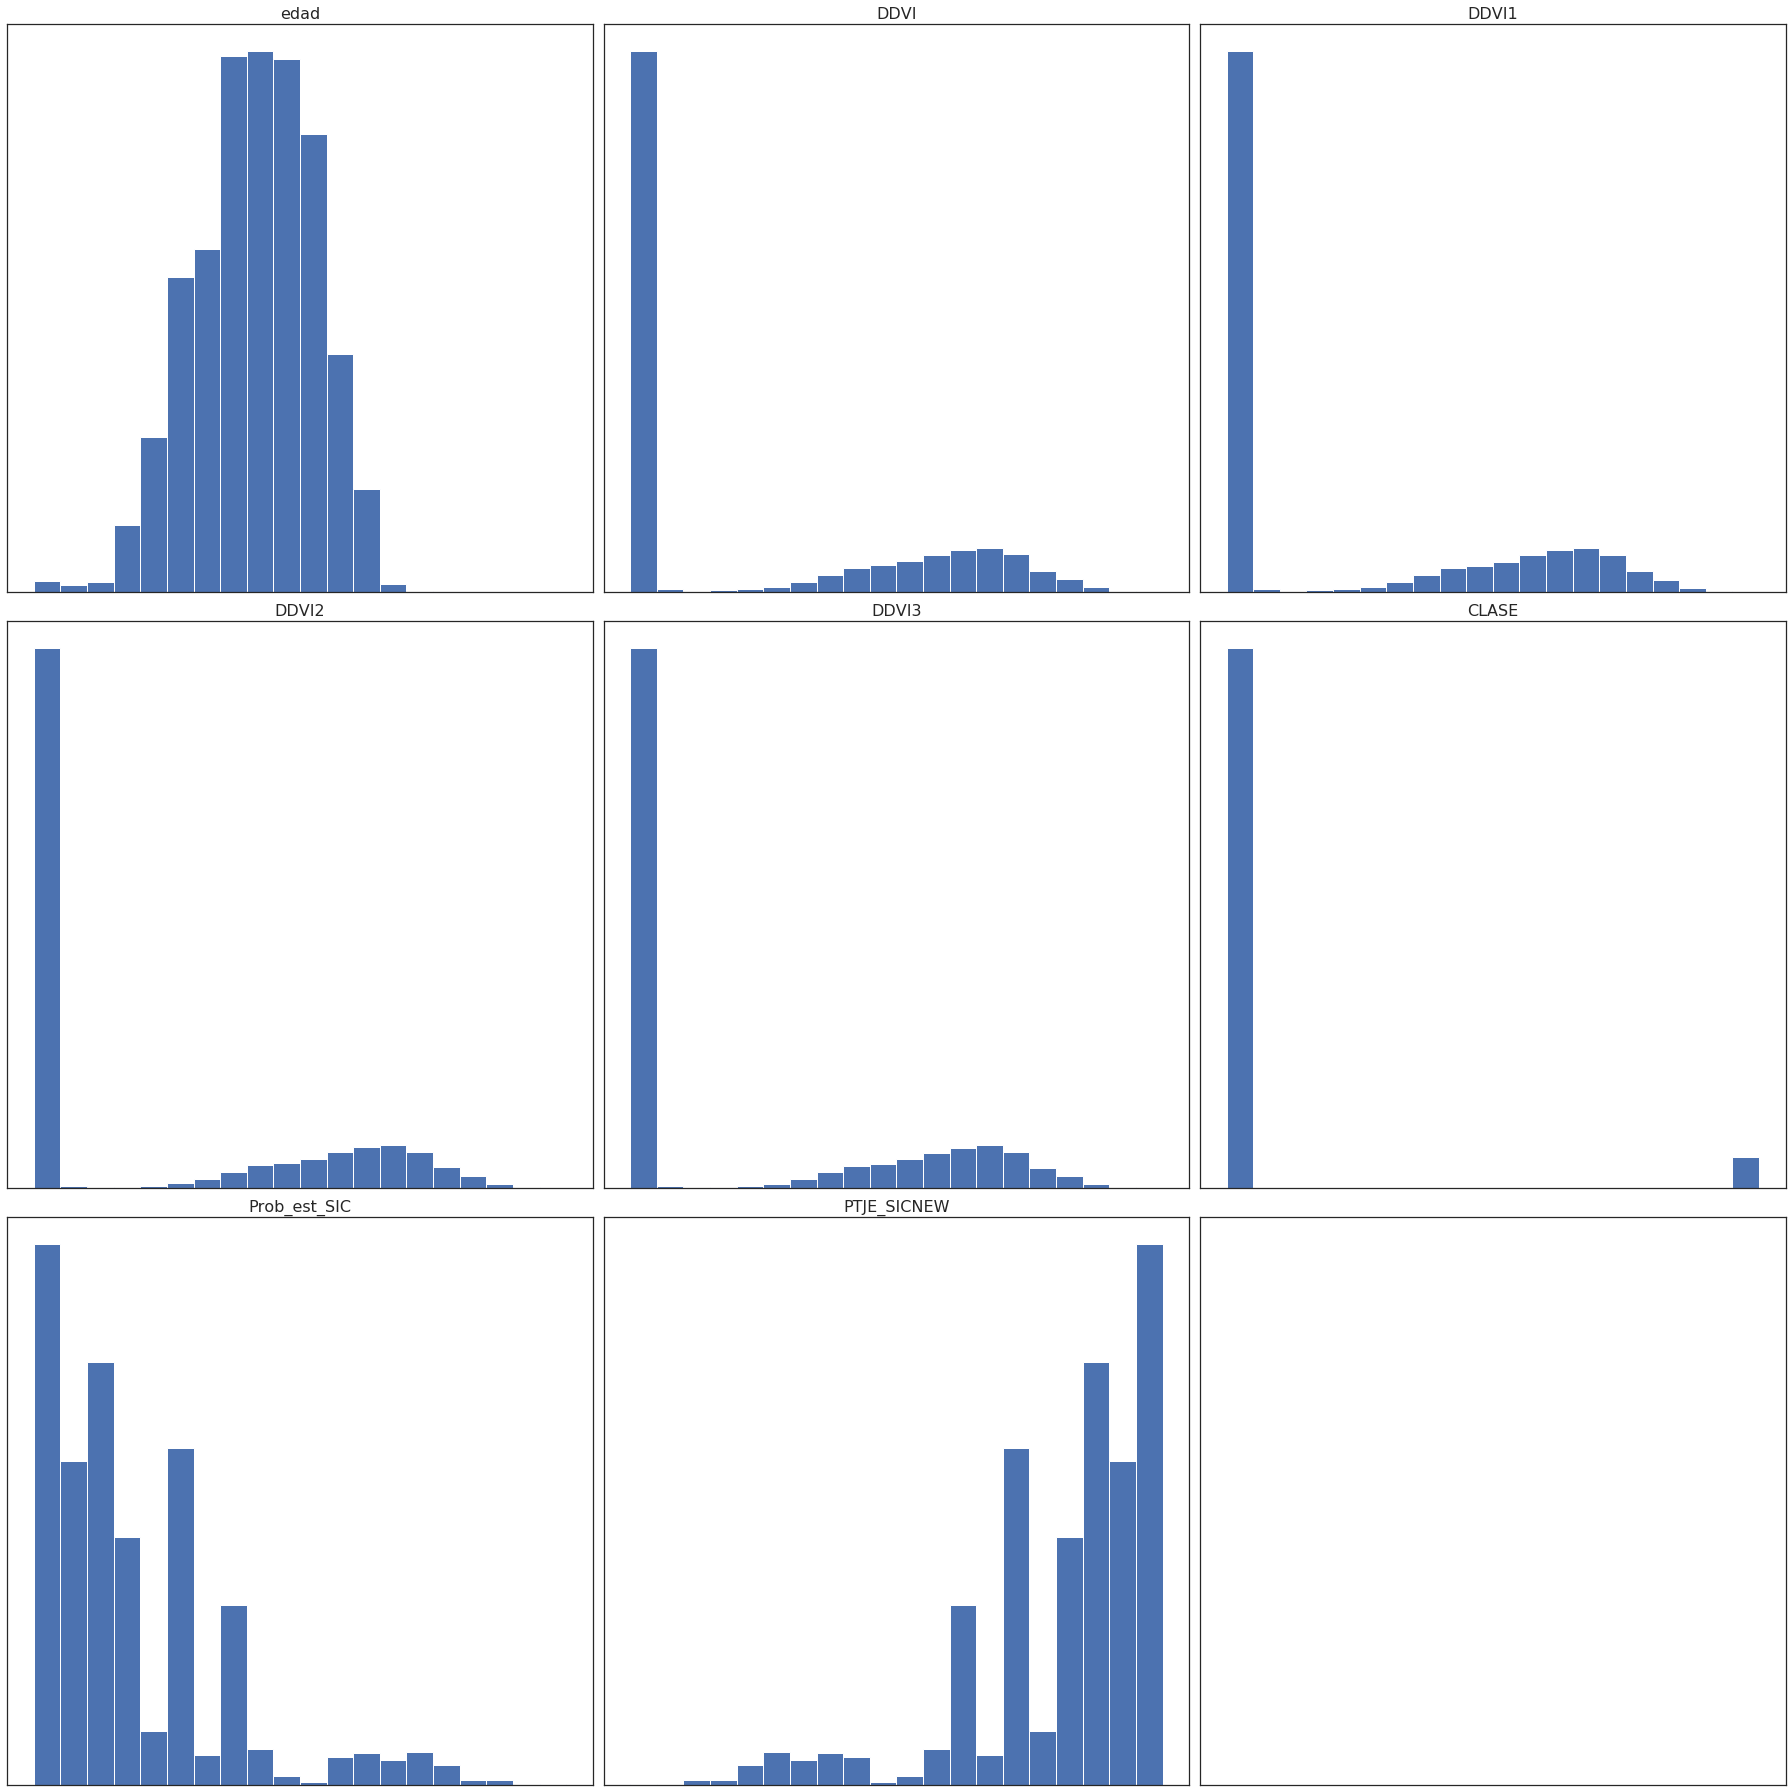

In [5]:
df1 = df0.copy()

for col in ['DDVI', 'DDVI1', 'DDVI2', 'DDVI3']:
    df1[col] = np.log(df1[col]+1)

plot_histograms(df1)

Para entrenar la red Bayesiana los datos deben ser discretos. En este ejemplo usamos K-Means para discretizar en contenedores.

In [11]:
df2 = df1.copy()
discr = preprocessing.KBinsDiscretizer(
        encode='ordinal', strategy='kmeans', n_bins=[20, 20, 20, 20, 20, 2, 20, 20])
df2[df2.columns] = discr.fit_transform(df2[df2.columns].values)
df2

,edad,DDVI,DDVI1,DDVI2,DDVI3,CLASE,Prob_est_SICNEW,PTJE_SICNEW
0,16.0,0.0,0.0,0.0,0.0,0.0,2.0,17.0
1,15.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
2,15.0,9.0,8.0,8.0,8.0,0.0,0.0,19.0
4,14.0,6.0,6.0,6.0,6.0,0.0,0.0,19.0
5,14.0,12.0,12.0,12.0,12.0,0.0,0.0,19.0
...,...,...,...,...,...,...,...,...
164777,4.0,14.0,14.0,14.0,14.0,0.0,5.0,14.0
164786,4.0,0.0,0.0,0.0,0.0,0.0,7.0,12.0
164790,0.0,14.0,14.0,14.0,14.0,0.0,5.0,14.0
164794,0.0,0.0,0.0,0.0,0.0,0.0,7.0,12.0


Los contenedores de `DDVI`:

In [14]:
df2['DDVI'].value_counts()

0.0     67716
13.0     4292
12.0     4038
14.0     3937
11.0     3762
15.0     3334
10.0     3253
9.0      3162
8.0      2846
16.0     2317
7.0      2144
6.0      1679
17.0     1565
5.0      1217
18.0     1077
4.0       689
3.0       341
1.0       337
19.0      324
2.0       226
Name: DDVI, dtype: int64

Aprender una red Bayesiana usando los datos:

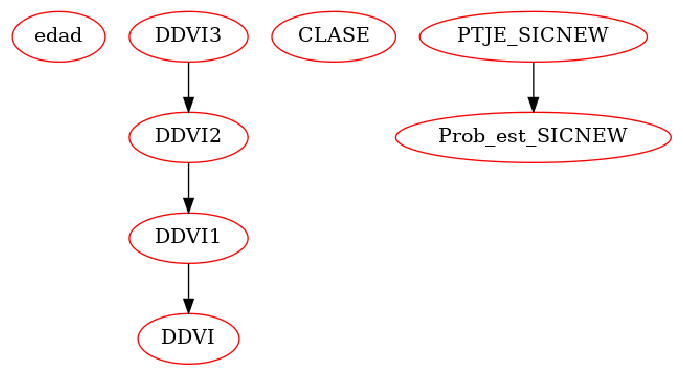

In [18]:
X = df2[:1000].values

model = BayesianNetwork.from_samples(X, state_names=df2.columns, algorithm='exact')

plt.rcParams["figure.figsize"] = (12,18)
model.plot()

## Llenar datos faltantes

Tomamos 20 filas de nuestros datos y borramos algunos valores aleatorio:

In [19]:
X = df2[600:620].values
X_missing = X.copy()

N = 20
for n in range(N):
    j = np.random.randint(X_missing.shape[0])
    i = np.random.randint(X_missing.shape[1])
    X_missing[j,i] = np.nan

pd.DataFrame(X_missing, columns=df0.columns)

,edad,DDVI,DDVI1,DDVI2,DDVI3,CLASE,Prob_est_SICNEW,PTJE_SICNEW
0,9.0,NaN,NaN,7.0,NaN,0.0,5.0,NaN
1,10.0,NaN,0.0,0.0,0.0,0.0,6.0,13.0
2,9.0,13.0,13.0,13.0,13.0,0.0,1.0,18.0
3,10.0,0.0,0.0,0.0,NaN,0.0,NaN,14.0
4,9.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0
5,7.0,9.0,9.0,10.0,10.0,0.0,1.0,18.0
6,9.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN
7,NaN,0.0,0.0,NaN,0.0,0.0,1.0,18.0
8,9.0,6.0,6.0,7.0,7.0,0.0,0.0,19.0
9,9.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0


A través las probabilidades de red Bayesiana que hemos aprendido antes, podemos inferir valores faltantes dado otros valores:

In [20]:
X_pred = np.array(model.predict(X_missing), np.int)

pd.DataFrame(X_pred, columns=df0.columns)

,edad,DDVI,DDVI1,DDVI2,DDVI3,CLASE,Prob_est_SICNEW,PTJE_SICNEW
0,9,6,7,7,7,0,5,14
1,10,0,0,0,0,0,6,13
2,9,13,13,13,13,0,1,18
3,10,0,0,0,0,0,5,14
4,9,0,0,0,0,0,5,14
5,7,9,9,10,10,0,1,18
6,9,0,0,0,0,0,2,17
7,8,0,0,0,0,0,1,18
8,9,6,6,7,7,0,0,19
9,9,0,0,0,0,0,5,14


Entre los valores reales y llenados calculamos la exactitud:

In [21]:
y_true = []
y_pred = []
for j in range(len(X_missing)):
    for i in range(len(X_missing[j,:])):
        if np.isnan(X_missing[j,i]):
            y_true.append(int(X[j,i]))
            y_pred.append(X_pred[j,i])

print('Exactitud: %.2f%%' % (metrics.accuracy_score(y_true, y_pred)*100.0,))

Exactitud: 75.00%


Por que todo los valores están en veinte cajones, invertimos el número del cajón al promedio de los valores en ese cajón. Los valores en el mismo cajón entonces obtienen el mismo valor. 

In [22]:
X_pred2 = np.array(discr.inverse_transform(X_pred), np.int)

for col in ['DDVI', 'DDVI1', 'DDVI2', 'DDVI3']:
    col = df2.columns.get_loc(col)
    X_pred2[:,col] = np.exp(X_pred2[:,col])-1
    
pd.DataFrame(X_pred2[:8], columns=df0.columns)

,edad,DDVI,DDVI1,DDVI2,DDVI3,CLASE,Prob_est_SICNEW,PTJE_SICNEW
0,55,53,53,53,53,0,0,915
1,58,0,0,0,0,0,0,902
2,55,2979,2979,2979,2979,0,0,976
3,58,0,0,0,0,0,0,915
4,55,0,0,0,0,0,0,915
5,45,402,402,402,402,0,0,976
6,55,0,0,0,0,0,0,962
7,50,0,0,0,0,0,0,976


Los datos reales (el *ground truth*) de las primeras 8 filas:

In [23]:
pd.DataFrame(np.array(df0[600:608].values, np.int), columns=df0.columns)

,edad,DDVI,DDVI1,DDVI2,DDVI3,CLASE,Prob_est_SICNEW,PTJE_SICNEW
0,56,71,93,114,134,0,0,921
1,58,0,0,0,0,0,0,900
2,54,3027,3023,3044,3061,0,0,981
3,58,0,0,0,0,0,0,911
4,55,0,0,0,0,0,0,911
5,48,470,466,571,565,0,0,979
6,54,0,0,0,0,0,0,958
7,54,0,0,0,0,0,0,969
